        Model  BLEU  Response Coherence  Diversity  Latency  TOPSIS Score  \
1  BlenderBot  0.78                0.85       0.76      180      0.701065   
2     ChatGPT  0.77                0.83       0.74      220      0.653536   
0    DialoGPT  0.75                0.80       0.72      200      0.172538   

   Rank  
1   1.0  
2   2.0  
0   3.0  


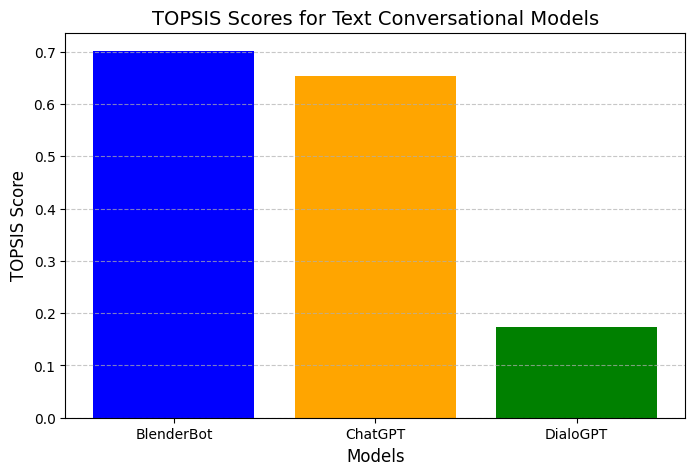

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Define the TOPSIS function
def topsis(data, weights):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data.iloc[:, 1:])
    weighted_data = normalized_data * weights
    ideal_best = np.max(weighted_data, axis=0)
    ideal_worst = np.min(weighted_data, axis=0)
    distance_best = np.sqrt(np.sum((weighted_data - ideal_best) ** 2, axis=1))
    distance_worst = np.sqrt(np.sum((weighted_data - ideal_worst) ** 2, axis=1))
    topsis_score = distance_worst / (distance_best + distance_worst)
    data['TOPSIS Score'] = topsis_score
    data['Rank'] = data['TOPSIS Score'].rank(ascending=False)
    return data.sort_values(by='Rank')

# Text Conversational Task Data
data_conversational = pd.DataFrame({
    "Model": ["DialoGPT", "BlenderBot", "ChatGPT"],
    "BLEU": [0.75, 0.78, 0.77],
    "Response Coherence": [0.80, 0.85, 0.83],
    "Diversity": [0.72, 0.76, 0.74],
    "Latency": [200, 180, 220]
})
weights_conversational = [0.3, 0.3, 0.2, 0.2]
results_conversational = topsis(data_conversational, weights_conversational)

# Display the results
print(results_conversational)

# Plotting the TOPSIS Scores
plt.figure(figsize=(8, 5))
plt.bar(results_conversational['Model'], results_conversational['TOPSIS Score'], color=['blue', 'orange', 'green'])
plt.xlabel('Models', fontsize=12)
plt.ylabel('TOPSIS Score', fontsize=12)
plt.title('TOPSIS Scores for Text Conversational Models', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Save the results to a CSV file
results_conversational.to_csv('results_conversational.csv', index=False)
